# Data Visualization with Matplotlib and Seaborn

__I can…__
- Explain what types of graphs best convey specific relationships
- Use the subplots syntax to create a graph
    - Line
    - Bar/hbar
    - Scatter
    - Hist
- Look in the documentation to understand new graphing methods
- Customize different aspects of a graph
    - labels (title, axis)
    - Linestyle 
    - Colors
- Create multiple graphs in one figure
- Use seaborn to quickly create statistical graphs

## Why Visualize Data?
or why can’t we just hand someone a table of data?


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
import pandas as pd

data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

### Dataframe vs Graph: Which do you prefer?

In [2]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
26,5.0,3.4,1.6,0.4,0
75,6.6,3.0,4.4,1.4,1
2,4.7,3.2,1.3,0.2,0
16,5.4,3.9,1.3,0.4,0
106,4.9,2.5,4.5,1.7,2


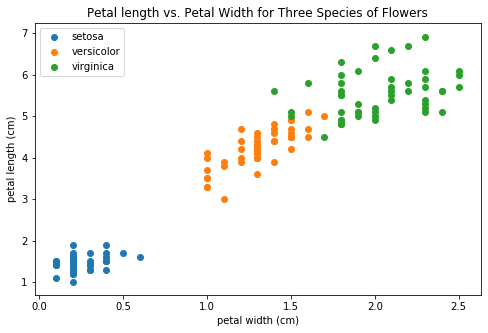

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

# Iterate through each type of flower and plot them using different colors
for flower in df['target'].unique():
    subset_df = df[df['target'] == flower]
    x = subset_df['petal width (cm)']
    y = subset_df['petal length (cm)']
    
    ax.scatter(x, y, label=data['target_names'][flower])

# Label your axes!
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('petal width (cm)')
ax.set_title('Petal length vs. Petal Width for Three Species of Flowers')
ax.legend();

What information in this graph jumps out to you?

## The Effectiveness of Visualizations

- People are highly visual and can synthesize visual information such more quickly than rows and columns of numbers 
- Precognitive understanding of the data
- Visual representations can be much more viscerally persuasive 

## What Makes an Effective Visualization?

- Each graph should have a clear point it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your audience! Come up with a use case and audience to pitch your visualizations

- Choose the correct graph for the relationship you are trying to communicate

- Label your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
        - Red and Down tends to be negative while Green and Up is positive
        - Lighter hues are seen as lower values and darker is higher values
        - Axes start at zero
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct


## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
        - Changing the axis scale
        - Using two different y axis scales to compare trends
        - Showing cumulative data which will always be increasing to hide a downturn in a trend
        - Pie charts
            (Comparing degrees is not something people are good at! Just use a bar chart.)
        - Inconsistent units
        - Not showing all of the data for motivated reasons
        - Percentages not adding up to 100

<img src="data/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/

_____



<img src="data/usa-today-2.png">

## How to Matplotlib

<img src="data/matplotlib_anatomy.png">

Explanation of non-obvious terms

__Figure__ - This is the sheet of paper all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

## Plotting Syntax

- There are many different ways to create plots but we will strongly suggest using the subplots method
    - This is useful for extensibility 
    - Gives you access to the figure and individual axis in a plot
    - More fine grained control of customizing your plot
    - Easily create additional axis on your figure
    - This syntax is a good level of abstraction
        - You can go deeper into the api but this should give you immediate access to most tools you will need for whatever plot you are making
    - Flatiron Specifc
        - Plotting code will be more easily readable for other students and instructors
        - You don’t need to remember many different ways to organize your code

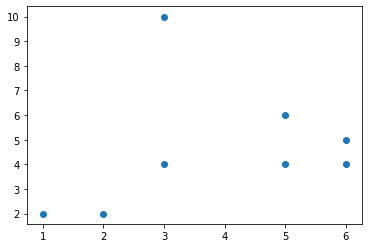

In [5]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Create data
x = [1, 2, 3, 3, 5, 5, 6, 6]
y = [2, 2, 10, 4, 6, 4, 5, 4]

# Create a scatter plot on our axis object
ax.scatter(x, y);

### What are other common types of Graphs? 

You can find examples of different types of graphs and styles here:
[Python Graphing Gallery](https://python-graph-gallery.com) or [Data Viz Project](https://datavizproject.com/)

Find one graph type that you aren't familiar with and take a minute to learn about it

What does it look like?

What kinds of information do you think it would be most effective at conveying?

## Customizing Your Graph

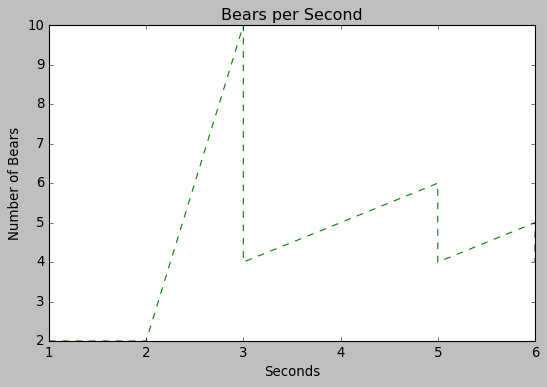

In [13]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(7, 5))

# Create data
x = [1, 2, 3, 3, 5, 5, 6, 6]
y = [2, 2, 10, 4, 6, 4, 5, 4]

# Create a line graph with a different color and linestyle
ax.plot(x, y, color='green', linestyle='--')

# Add in axis labels
ax.set_xlabel('Seconds')
ax.set_ylabel('Number of Bears')
ax.set_title('Bears per Second')

fig.tight_layout()
fig.savefig('bears');

### Look at the documentation to see all of the possible colors, linestyles and more

[Matplotlib named colors](https://matplotlib.org/2.0.2/examples/color/named_colors.html)

[Line styles](https://matplotlib.org/2.0.2/examples/color/named_colors.html)

### Set a new style for all graphs

Find another style from the Docs and set the style. Once you've set the style try rerunning older graphs:

[Style Sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

In [12]:
style = 'classic'
plt.style.use(style)

### Minor Digression: Plotting functions

I want to plot the sine function. How do I do it? Numpy to the rescue!

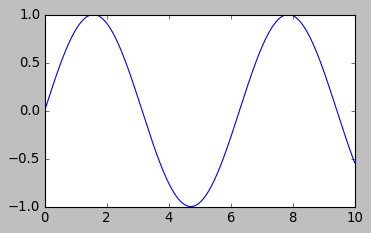

In [14]:
import numpy as np 

fig, ax = plt.subplots(figsize=(5, 3))

# Look in the docs to understand what linspace is doing and why num=5 is a bad choice
x = np.linspace(0, 10, num=1000)

#Evaluate the function at each point
y = np.sin(x)

ax.plot(x, y);

### Multiple plots on one graph

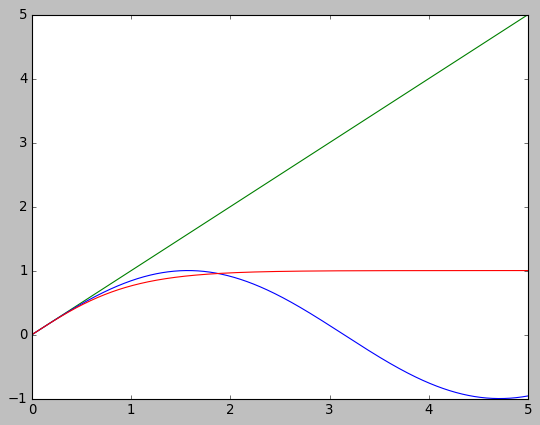

In [15]:
fig, ax = plt.subplots()

x = np.linspace(0, 5, num=1000)
y_1 = np.sin(x) - 2
y_2 = np.tanh(x)

funcs = [np.abs, np.sin, np.tanh]
colors = ['green', 'blue', 'red']

for func, color in zip(funcs, colors):
    ax.plot(x, func(x), color=color)
    
    
# # plot sine
# ax.plot(x, y_1)

# # To plot the tanh just use the axis object and plot again
# ax.plot(x, y_2)

# ax.plot(x, np.abs(x), color='black');

### Histograms

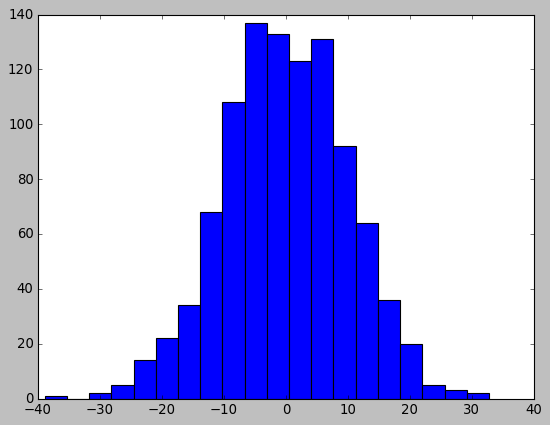

In [16]:
fig, ax = plt.subplots()

# Pull 1000 values from a normal distribution with a mean of 0 and std of 10
x = np.random.normal(0, 10, size=1000)

ax.hist(x, bins=(20));

# Challenge: Add a vertical line indicating the mean of the values



### Bar charts

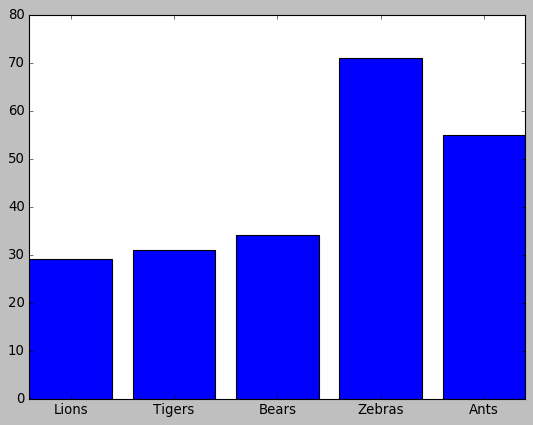

In [17]:
# Make a bar chart with these labels and values

labels = ['Lions', 'Tigers', 'Bears', 'Zebras', 'Ants']
values = np.random.randint(3, 100, size=len(labels))

fig, ax = plt.subplots()

ax.bar(labels, values);

## Your Turn!

Grab a partner and create 2 different kinds of graphs with the given dataset.

In [31]:
wine_data = load_wine()
wd = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
wd['target'] = wine_data['target']

In [39]:
wd.sample(n=2)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.0,0.57,1.96,660.0,2
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.7,0.86,3.30,315.0,1


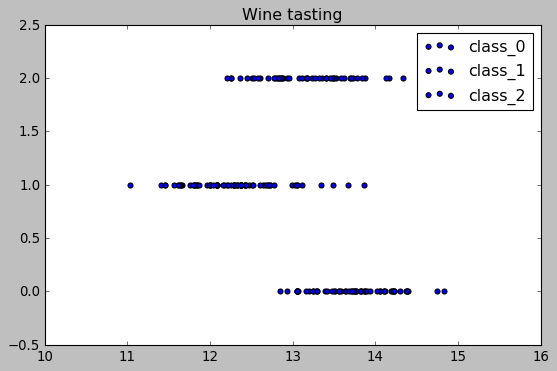

In [50]:
# fig, ax = plt.subplots(figsize=(8, 5))

# # Iterate through each type of flower and plot them using different colors
# for flower in df['target'].unique():
#     subset_df = df[df['target'] == flower]
#     x = subset_df['petal width (cm)']
#     y = subset_df['petal length (cm)']
    
#     ax.scatter(x, y, label=data['target_names'][flower])

# # Label your axes!
# ax.set_ylabel('petal length (cm)')
# ax.set_xlabel('petal width (cm)')
# ax.set_title('Petal length vs. Petal Width for Three Species of Flowers')
# ax.legend();

wine_fig, wine_ax = plt.subplots(figsize=(8, 5))

# Iterate through each type of flower and plot them using different colors
for wine in wd['target'].unique():
    subset_wd = wd[wd['target'] == wine]
    x_w = subset_wd['alcohol']
    y_w = subset_wd['target']
    
    wine_ax.scatter(x_w, y_w, label=wine_data['target_names'][wine])

# Label your axes!
# wine_ax.set_ylabel('nonflavanoid phenols')
# wine_ax.set_xlabel('flavanoids')
wine_ax.set_title('Wine tasting')
wine_ax.legend();

## Seaborn

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

In [52]:
import seaborn as sns

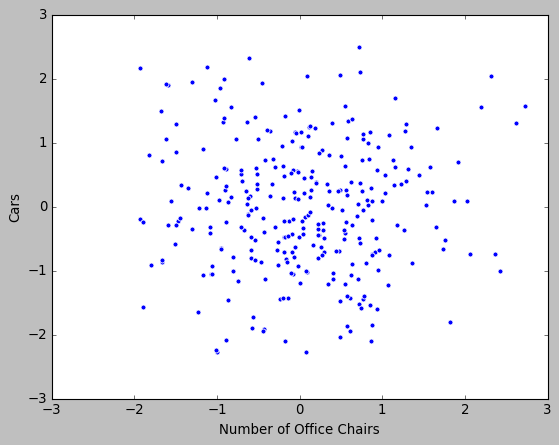

In [53]:
fig, ax = plt.subplots()

x, y = np.random.randn(2, 300)

# With Seaborn we can still use the subplots syntax by passing our
# axis object into the graphing function
sns.scatterplot(x, y, ax=ax)
ax.set_ylabel('Cars')
ax.set_xlabel('Number of Office Chairs');

### Violin Plots

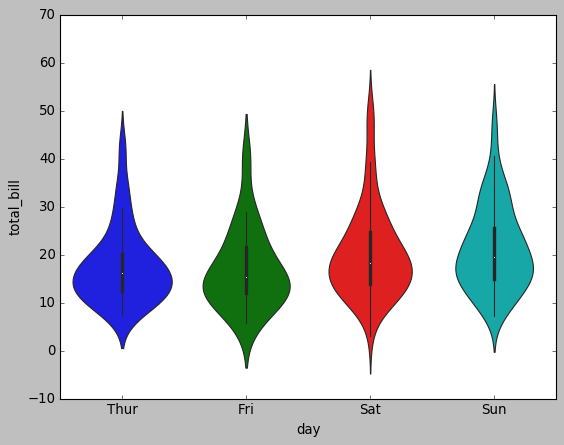

In [54]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

sns.violinplot(x="day", y="total_bill", data=tips);

Use another seaborn ploting method to explore the dataset!

In [35]:
# Your code here


